# Introduction
This case study is the capstone project of **Google Data Analytics Professional Certificate**. The **6 steps of data analysis** is used to present this analysis.
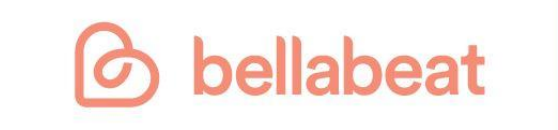


## How Can A Wellness Technology Company Play It Smart?

# Step 1: Ask

### 1.1 Background
Bellabeat is a high-tech manufacturer of health-focused products for women. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

### 1.2 Business Task
`Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app and discover trends and insights for Bellabeat marketing strategy.`

### 1.3 Business Objectives
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?
 
---

# Step 2: Prepare

### 2.1 Information about Data Source:
 - The Data can be found at [Kaggle: Fitbit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit).
 - Dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016.
 - Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical    activity, heart rate, and sleep monitoring.
 
### 2.2 Limitations of Dataset:
 - Data collected from year 2016.
 - Only 30 respondants.
 - Data was collected in a survey.
 
### 2.3 Is Data ROCC?
 
 A good data source is ROCCC which stands for Reliable, Original, Comprehensive, Current, and Cited.

- Reliable - LOW - Not reliable as it only has 30 respondents.
- Original - LOW - Third party provider (Amazon Mechanical Turk).
- Comprehensive - MED - Parameters match most of Bellabeat's products' parameters.
- Current - LOW - Data is 5 years old and is not relevant.
- Cited - LOW - Data collected from third party, hence unknown.

### 2.4 Data Selection:
- `dailyActivity_merged.csv`
- `hourlySteps_merged.csv`
- `sleepDay_merged.csv`

---

# Step 3: Process
 We will be using python to process and analyze the data.
 
 ### 3.1 Setting up the environment
 Importing python libraries:
 - Numpy
 - Pandas
 - Matplotlib
 - Seaborn
 

In [52]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 3.2 Importing the datasets

In [53]:
# reading the datasets using read_csv function
activity = pd.read_csv('./data-sets/dailyActivity_merged.csv')
steps = pd.read_csv('./data-sets/hourlySteps_merged.csv')
sleep = pd.read_csv('./data-sets/sleepDay_merged.csv')

### 3.3 Observe and familiarize with th data

For displaying all the datasets at once, we will use `IPython` library and manipulate the CSS.

In [54]:
# code to display all the datasets together
from IPython.display import display, HTML
CSS = """"
   .output {
       flex-direction:row;
   }
    """

HTML('<style>{}</style>'.format(CSS))

In [55]:
# looking through the datasets
display(activity.head())
display(steps.head())
display(sleep.head())

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


### 3.4 Changing case for columns

We will change columns format from `XxxYyy` to `xxxYyy`

In [56]:
# converting the columns to camel case
activity.columns = [(x[0].lower()+x[1:]) for x in activity.columns]
steps.columns = [(x[0].lower()+x[1:]) for x in steps.columns]
sleep.columns = [(x[0].lower()+x[1:]) for x in sleep.columns]
print(activity.columns)
print(steps.columns)
print(sleep.columns)

Index(['id', 'activityDate', 'totalSteps', 'totalDistance', 'trackerDistance',
       'loggedActivitiesDistance', 'veryActiveDistance',
       'moderatelyActiveDistance', 'lightActiveDistance',
       'sedentaryActiveDistance', 'veryActiveMinutes', 'fairlyActiveMinutes',
       'lightlyActiveMinutes', 'sedentaryMinutes', 'calories'],
      dtype='object')
Index(['id', 'activityHour', 'stepTotal'], dtype='object')
Index(['id', 'sleepDay', 'totalSleepRecords', 'totalMinutesAsleep',
       'totalTimeInBed'],
      dtype='object')


### 3.5 Data Cleaning and Preparation

Steps:
1. Changing columns data types to the correct ones.
2. Checking for null values and duplicates if any.
3. Dropping nulls and duplicates.

#### 3.5.1 Checking for the columns data types

In [57]:
# checking the data types for each dataset
print(activity.dtypes)
print()
print(sleep.dtypes)
print()
print(steps.dtypes)

id                            int64
activityDate                 object
totalSteps                    int64
totalDistance               float64
trackerDistance             float64
loggedActivitiesDistance    float64
veryActiveDistance          float64
moderatelyActiveDistance    float64
lightActiveDistance         float64
sedentaryActiveDistance     float64
veryActiveMinutes             int64
fairlyActiveMinutes           int64
lightlyActiveMinutes          int64
sedentaryMinutes              int64
calories                      int64
dtype: object

id                     int64
sleepDay              object
totalSleepRecords      int64
totalMinutesAsleep     int64
totalTimeInBed         int64
dtype: object

id               int64
activityHour    object
stepTotal        int64
dtype: object


From the above, we can see that the activityDate, activityHour and sleepDay are stored as an object data type which is not suitable as all of them are of the datetime format.

Changing the data types to data time using `pd.to_datetime`

In [58]:
# converting the day and date columns to date time
activity['activityDate'] = pd.to_datetime(activity['activityDate'] , format = '%m/%d/%Y')

steps['activityHour'] = pd.to_datetime(steps['activityHour'],format='%m/%d/%Y %I:%M:%S %p')

Since only date is needed from the sleep dataset, we will extract the date from it using `dt.date` which converts it to an object data type. Then we will again change the data type from object to date time.

In [59]:
date_time = pd.to_datetime(sleep['sleepDay'] , format='%m/%d/%Y %H:%M:%S %p').dt.date

sleep['sleepDay'] = pd.to_datetime(date_time, format='%Y-%m-%d')

Checking again for the data types...

In [60]:
print(activity.dtypes)
print()
print(sleep.dtypes)
print()
print(steps.dtypes)

id                                   int64
activityDate                datetime64[ns]
totalSteps                           int64
totalDistance                      float64
trackerDistance                    float64
loggedActivitiesDistance           float64
veryActiveDistance                 float64
moderatelyActiveDistance           float64
lightActiveDistance                float64
sedentaryActiveDistance            float64
veryActiveMinutes                    int64
fairlyActiveMinutes                  int64
lightlyActiveMinutes                 int64
sedentaryMinutes                     int64
calories                             int64
dtype: object

id                             int64
sleepDay              datetime64[ns]
totalSleepRecords              int64
totalMinutesAsleep             int64
totalTimeInBed                 int64
dtype: object

id                       int64
activityHour    datetime64[ns]
stepTotal                int64
dtype: object


All the columns are in their correct format. So we can move to other steps.

In [61]:
# checking unique number of users
print('Users in Activity dataset:',activity['id'].unique().shape[0])
print('Users in Steps dataset:',steps['id'].unique().shape[0])
print('Users in Sleep dataset',sleep['id'].unique().shape[0])

Users in Activity dataset: 33
Users in Steps dataset: 33
Users in Sleep dataset 24


#### 3.5.2 Checking for duplicates and nulls
1. Checking duplicates

In [62]:
print(activity.duplicated().sum())
print(steps.duplicated().sum())
print(sleep.duplicated().sum())

0
0
3


The sleep dataset has 3 dupliacates. We will drop them in the next step.

2. Checking for null values

In [63]:
# Checking for null values
print(activity.isnull().sum())
print()
print(steps.isnull().sum())
print()
print(sleep.isnull().sum())


id                          0
activityDate                0
totalSteps                  0
totalDistance               0
trackerDistance             0
loggedActivitiesDistance    0
veryActiveDistance          0
moderatelyActiveDistance    0
lightActiveDistance         0
sedentaryActiveDistance     0
veryActiveMinutes           0
fairlyActiveMinutes         0
lightlyActiveMinutes        0
sedentaryMinutes            0
calories                    0
dtype: int64

id              0
activityHour    0
stepTotal       0
dtype: int64

id                    0
sleepDay              0
totalSleepRecords     0
totalMinutesAsleep    0
totalTimeInBed        0
dtype: int64


Luckily, there is no null values. Therefore we can move to the next step and drop the duplicates.

#### 3.5.3 Dropping duplicates

In [64]:
sleep.drop_duplicates(inplace=True)
steps.drop_duplicates(inplace=True)

Re-checking for duplicates...

In [65]:
print(sleep.duplicated().sum())
print(steps.duplicated().sum())
print(activity.duplicated().sum())

0
0
0


All the duplicates are removed. We can move to the next step.



# Step 4: Analyze

### 4.1 Merging the datasets
Steps:
- Merging the activity and sleep datasets for further analysis
- Dropping the `sleepDay` column from the merged data set as it appeared twice in the dataset.
- Renaming the `activityDate` to `date` for simplicity.

Merging the activity and sleep dataset and dropping the `sleepDay` column.

In [66]:
merged_activity_sleep = activity.merge(sleep , how = 'inner' , left_on = ['id','activityDate'] , right_on = ['id','sleepDay']).drop('sleepDay',axis=1)
merged_activity_sleep.head()

,id,activityDate,totalSteps,totalDistance,trackerDistance,loggedActivitiesDistance,veryActiveDistance,moderatelyActiveDistance,lightActiveDistance,sedentaryActiveDistance,veryActiveMinutes,fairlyActiveMinutes,lightlyActiveMinutes,sedentaryMinutes,calories,totalSleepRecords,totalMinutesAsleep,totalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


Renaming the `activityDate` to `date` for simplicity.

In [67]:
merged_activity_sleep.rename(columns={'activityDate':'date'},inplace=True)

merged_activity_sleep.head()

,id,date,totalSteps,totalDistance,trackerDistance,loggedActivitiesDistance,veryActiveDistance,moderatelyActiveDistance,lightActiveDistance,sedentaryActiveDistance,veryActiveMinutes,fairlyActiveMinutes,lightlyActiveMinutes,sedentaryMinutes,calories,totalSleepRecords,totalMinutesAsleep,totalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


### 4.2 Analyzing number of steps users walk in a day
Steps:
- We need on average how many number of steps users take per day.
- Extracting day from the `date` column using `dt.day_name()` and storing that in a new column called `day`.
- Grouping by the `day` and finding the average number of steps.
- Renaming the `totalSteps` to `avgSteps`

In [68]:
# declaring a list which will be used for ordering using .reindex()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# extracting the day name
merged_activity_sleep['day'] = merged_activity_sleep['date'].dt.day_name()
# getting the average steps and renaming the totalSteps column
avg_steps_per_day = merged_activity_sleep.groupby('day').mean()[['totalSteps']].reindex(cats).rename(columns={'totalSteps':'avgSteps'}).reset_index()

In [69]:
avg_steps_per_day

,day,avgSteps
0,Monday,9273.217391
1,Tuesday,9182.692308
2,Wednesday,8022.863636
3,Thursday,8183.515625
4,Friday,7901.403509
5,Saturday,9871.122807
6,Sunday,7297.854545


### 4.3 Classifying users based on the average number of steps
We want to classify users based on the average number of steps they take.
Steps:
- Define a function for the classification.
- Getting the average number of steps per user.
- Renaming the resultant column to `avg_steps`.
- Applying the defined function to the `avg_steps` column and storing the result in a new column `type`.

In [70]:
# defining function for classification 
def classify_user(steps):
    if steps >= 10000:
        return 'Highly active'
    if steps >= 5000:
        return 'Fairly active'
    else:
        return 'Lightly active'

In [71]:
# getting the average number of steps per user and renaming the column
avg_steps_per_user = merged_activity_sleep.groupby('id').mean()[['totalSteps']].rename(columns={'totalSteps':'avg_steps'}).reset_index()
# applying the defined function on the avg_steps column
avg_steps_per_user['type']=avg_steps_per_user['avg_steps'].apply(classify_user)

avg_steps_per_user.head()

,id,avg_steps,type
0,1503960366,12405.680000,Highly active
1,1644430081,7967.750000,Fairly active
2,1844505072,3477.000000,Lightly active
3,1927972279,1490.000000,Lightly active
4,2026352035,5618.678571,Fairly active


### 4.4 Analysing average of hours users sleep per day
We want to know average number of hours users sleep per day.
Steps:
- Getting the required columns in a new datset.
- Converting the minutes to sleep in a new column.
- getting the average number of hours and reordering days.
- Changing the data type pf column from `decimal` to `int`.

In [72]:
# getting the required columns.
sleep_hours = merged_activity_sleep[['day','totalMinutesAsleep']]
#converting columns from minutes to hours
sleep_hours['sleep_in_hrs'] = sleep['totalMinutesAsleep'] / 60
# getting average number of columns and reordering it.
sleep_per_day = sleep_hours.groupby('day').mean()[['sleep_in_hrs']].reindex(cats).reset_index()
# changing the data type.
sleep_per_day['sleep_in_hrs'] = sleep_per_day['sleep_in_hrs'].astype('int')

sleep_per_day

C:\Users\yas33\AppData\Local\Temp\ipykernel_15312\2596176836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_hours['sleep_in_hrs'] = sleep['totalMinutesAsleep'] / 60


,day,sleep_in_hrs
0,Monday,7
1,Tuesday,6
2,Wednesday,6
3,Thursday,6
4,Friday,7
5,Saturday,6
6,Sunday,7


### 4.5 Classifying users based on their sleep hours
We will classify users based on the average number of hours they sleep.
Steps:
- Define a classification function.
- Get the required columns.
- Get the average per user.
- Change the `totalMinutesAsleep` column to `hours`.
- Convert minutes to hours.
- Apply the function

In [73]:
# classification function
def classify_sleep(hr):
    if hr >=8.0:
        return 'Good amount of sleep'
    if hr >= 6.0:
        return 'Moderate amount of sleep'
    else:
        return 'Low amount of sleep'

In [74]:
# avg hours per user
avg_sleep = merged_activity_sleep[['id','totalMinutesAsleep']]
# getting average hours
avg_sleep_per_user = avg_sleep.groupby('id').mean()[['totalMinutesAsleep']].reset_index()
# renaming the column
avg_sleep_per_user = avg_sleep_per_user.rename(columns={'totalMinutesAsleep':'hours'})
# converting minutes to hours
avg_sleep_per_user['hours'] = avg_sleep_per_user['hours'] //60
# applying the function
avg_sleep_per_user['amount'] = avg_sleep_per_user['hours'].apply(classify_sleep)
avg_sleep_per_user.head()

,id,hours,amount
0,1503960366,6.0,Moderate amount of sleep
1,1644430081,4.0,Low amount of sleep
2,1844505072,10.0,Good amount of sleep
3,1927972279,6.0,Moderate amount of sleep
4,2026352035,8.0,Good amount of sleep


### 4.6 Which hour is most active hour?
We will use the steps dataset as it has number of steps per hour.
Steps:
- Converting the `activityHour` from 12-hr format to 24-hr format.
- Getting the average number of steps.
- Casting the resultant column to `int`.
- Renaming the `stepTotal` column to `avgSteps`.

In [75]:
# changing the format from 12-hr to 24-hr
steps['activityHour'] = steps['activityHour'].dt.strftime('%H:%M:%S')
# calculating the average number of steps
hourly_steps=steps.groupby('activityHour').mean()[['stepTotal']].reset_index()
# casting as integer
hourly_steps['stepTotal']=hourly_steps['stepTotal'].astype('int')
#renaming the column
hourly_steps=hourly_steps.rename(columns={'stepTotal':'avgSteps'})

hourly_steps.head()

,activityHour,avgSteps
0,00:00:00,42
1,01:00:00,23
2,02:00:00,17
3,03:00:00,6
4,04:00:00,12


### 4.7 Analyzing the usage of smart devices
We will for how many days each user wore his fitbit and will classify them accordingly.
Steps:
- Define a classification function.
- Get the count of days per user
- Apply the classification function.

In [76]:
# function for classification
def user_classify(days):
    if days >20 and days <=31:
        return 'high usage'
    if days >10 and days <=20:
        return 'moderate user'
    else:
        return 'low usage'


In [77]:
# getting the count of days and storing it to a new variable
usage=merged_activity_sleep.groupby('id').count()[['date']].reset_index()
# applying the function
usage['use'] = usage['date'].apply(user_classify)
usage.head()

,id,date,use
0,1503960366,25,high usage
1,1644430081,4,low usage
2,1844505072,3,low usage
3,1927972279,5,low usage
4,2026352035,28,high usage


# Step 5: Share
Visualizing:
 1. How many users walk the recommended number of steps?
 2. How many users get recommended number of sleep hours?
 3. Hours when users are most active.
 4. Finding correlation between:
          - Daily Steps vs Sleep
          - Daily Steps vs Calories burnt
 5. Smart Device Daily Usage.
 

In [78]:
# using seaborn to set the background as darkgrid
sns.set_style('darkgrid')

### 5.1 How many users walk the recommended number of steps?
According to an article in [healthline](https://www.healthline.com/health/how-many-steps-a-day),the recommended number of steps a female should walk is around 10,000 steps.

We will visualize how many users in our dataset follow the same.
Steps:
- Using the `avg_steps_per_user` in which we classified the user according to the number of steps they walk, we will count the number of each type of user with the help of `type` column and plot the same using pie plot.


In [79]:
# getting the count of each type of user
dist = avg_steps_per_user['type'].value_counts()
dist

Fairly active     14
Highly active      5
Lightly active     5
Name: type, dtype: int64

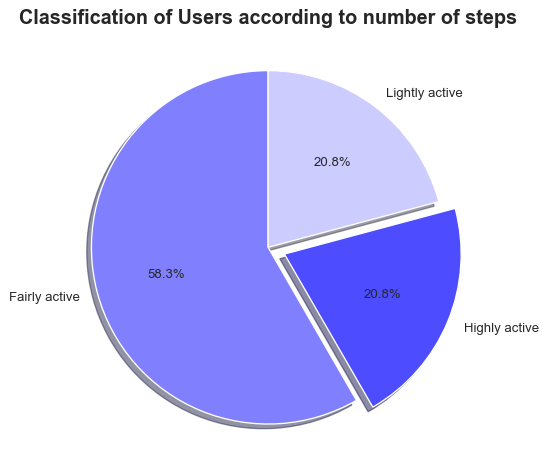

In [80]:
# plotting the pie chart
plt.figure(figsize=(6,6),dpi=95)
plt.title('Classification of Users according to number of steps',fontdict={'fontsize':'15','fontweight':'bold'})
explode=(0.0,0.1,0.0)
plt.axis('equal')
plt.pie(dist,labels=dist.index,explode=explode,autopct='%1.1f%%',startangle=90,shadow=True,colors=['#8080ff','#4d4dff','#ccccff']);

From the above chart, it is clear that only 20.8% users walk the recommended steps.

### 5.2 How many users get recommended number of sleep hours?
The recommended number of sleeps hours is 7-8 hrs.

We will visualize how many users in our data set get good sleep.
Steps:
- Using the `avg_sleep_per_user` data set in which classified user according to their sleeping hours and `amount` column for plotting the same in a pie chart.

In [81]:
# getting the count of each type of user
count = avg_sleep_per_user['amount'].value_counts()

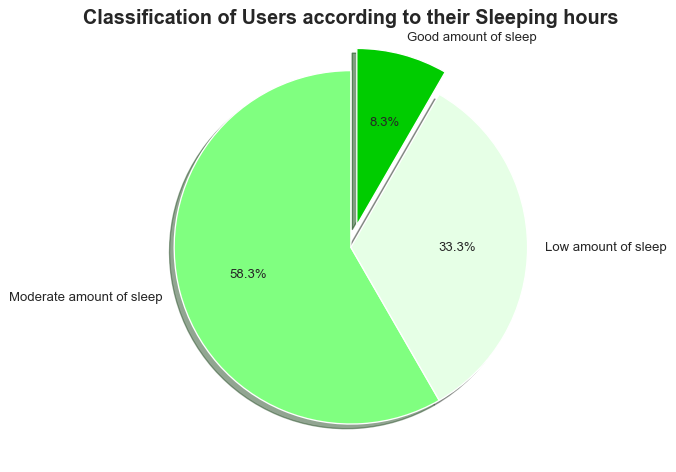

In [82]:
# plotting the pie chart
plt.figure(figsize=(6,6),dpi=95)
plt.title('Classification of Users according to their Sleeping hours',fontdict={'fontsize':'15','fontweight':'bold'})
explode=(0.0,0.0,0.13)
plt.axis('equal')
plt.pie(count,labels=count.index,explode=explode,autopct='%1.1f%%',startangle=90,shadow=True,colors=['#80ff80','#e6ffe6','#00cc00']);

From the chart above only 8.3% users are getting the recommended number of steps and 33.3% are getting less than 6 hrs of sleep.

### 5.3 Hours when users are most active.
We will be using `hourly_steps` dataframe and `avgSteps` & `activityHour` columns to visualize which hours are the active hours.

Steps:
- Make a list of `color` to provide different colors to the plot based on the value of average steps.
- Plot a bar graph using the same data set.

In [83]:
# make a list of colors
color=[]
for val in hourly_steps['avgSteps']:
    if val >=500:
        color.append('#e62e00')
    elif val >=350:
        color.append('#ff6600')
    elif val>=150:
        color.append('#66ff99')
    else:
        color.append('#b3ffd9')

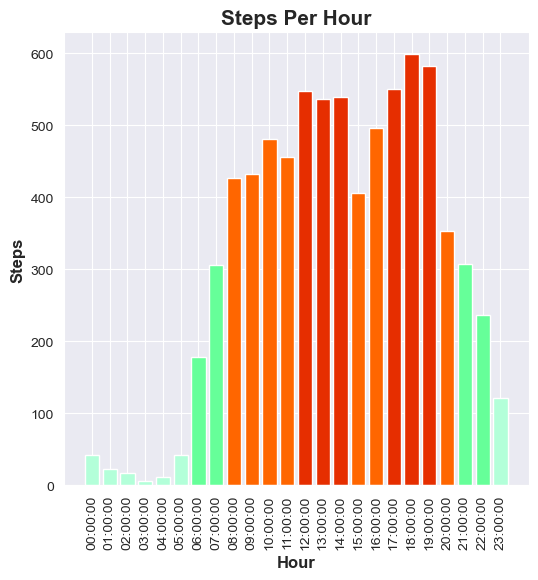

In [84]:
#plotting a bar graph
plt.figure(figsize=(6,6),dpi=100)
plt.bar(hourly_steps['activityHour'],hourly_steps['avgSteps'],color=color)
plt.xticks(rotation=90)
plt.xlabel('Hour',fontdict={'fontsize':12,'fontweight':'bold'})
plt.ylabel('Steps',fontdict={'fontsize':12,'fontweight':'bold'})
plt.title('Steps Per Hour',fontdict={'fontsize':15,'fontweight':'bold'});

Most active hours are from 12pm to 2pm in the afternoon and from 5pm to 7pm in the evening.

### 5.4 Finding corelations.
1. Between daily steps vs sleep in minutes.
2. Between daily steps vs calories burnt.

#### 5.4.1 Daily Steps vs Sleep in Minutes
- Using `merged_activity_merged` dataset and `totalSteps` & `totalMinutesAsleep` columns for plotting the scatter plot.

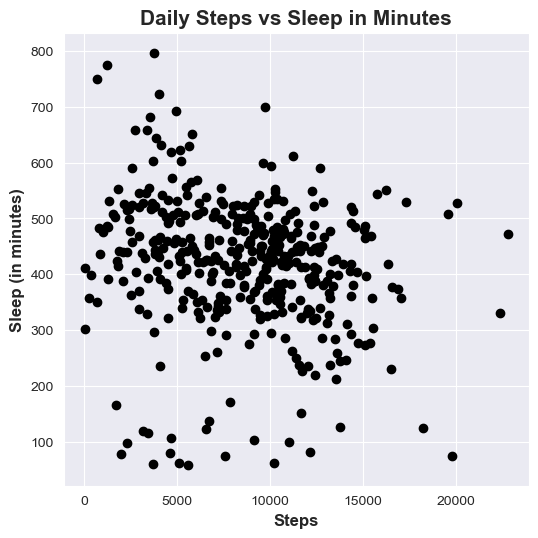

In [85]:
# plotting the scatterplot
plt.figure(figsize=(6,6),dpi=100)
plt.scatter(merged_activity_sleep['totalSteps'],merged_activity_sleep['totalMinutesAsleep'],color='black')
plt.xlabel('Steps',fontdict={'fontsize':12,'fontweight':'bold'})
plt.ylabel('Sleep (in minutes)',fontdict={'fontsize':12,'fontweight':'bold'})
plt.title('Daily Steps vs Sleep in Minutes',fontdict={'fontsize':15,'fontweight':'bold'});

There is no positive relation between daily steps and sleeping minutes.

#### 5.4.2 Daily Steps vs Calories Burnt
- using `merged_activity_sleep` data set and `totalSteps` & `calories` columns for plotting the scatter plot.

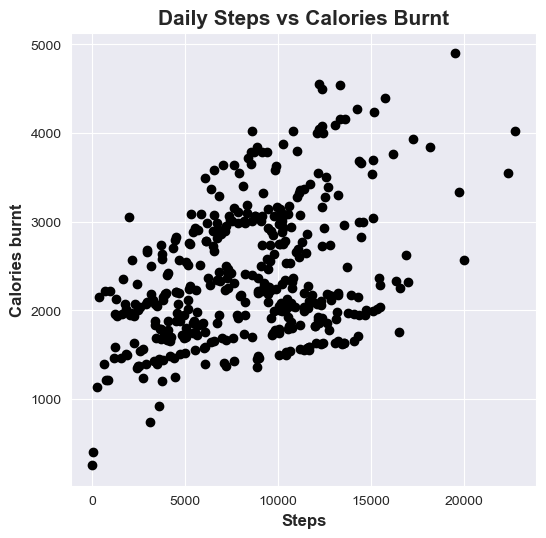

In [86]:
# plotting the scatterplot
plt.figure(figsize=(6,6),dpi=100)
plt.scatter(merged_activity_sleep['totalSteps'],merged_activity_sleep['calories'],color='#000000')
plt.xlabel('Steps',fontdict={'fontsize':12,'fontweight':'bold'})
plt.ylabel('Calories burnt',fontdict={'fontsize':12,'fontweight':'bold'})
plt.title('Daily Steps vs Calories Burnt',fontdict={'fontsize':15,'fontweight':'bold'});

We can see a positive relation as the more you walk the more calories you will loose.

**Checking the total number of days we have user records for.**

In [87]:
print(activity['activityDate'].unique().size)
print(sleep['sleepDay'].unique().size)
print(merged_activity_sleep['date'].unique().size)

31
31
31


### 5.5 Smart device daily usage
- using `usage` dataset and counting each type of usage using `use` column.

In [88]:
# counting each type of usage
usage_count = usage['use'].value_counts()
usage_count

high usage       12
low usage         9
moderate user     3
Name: use, dtype: int64

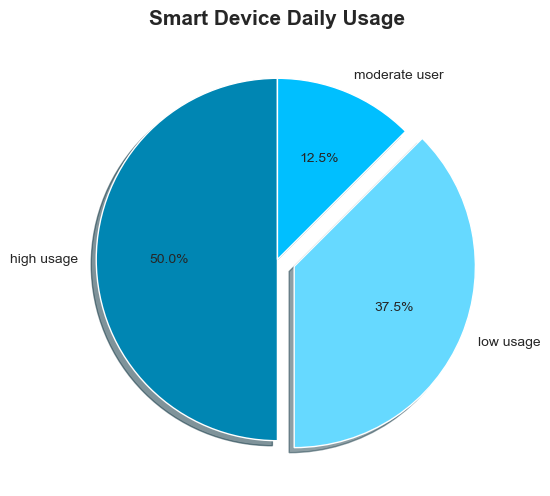

In [89]:
# plotting the pie chart
plt.figure(figsize=(6,6),dpi=100)
explode=(0.0,0.1,0.0)
plt.title('Smart Device Daily Usage',fontdict={'fontsize':15,'fontweight':'bold'})
plt.pie(usage_count,labels=usage_count.index,autopct='%1.1f%%',explode=explode,startangle=90,colors=['#0086b3','#66d9ff','#00bfff'],shadow=True);

 Only 50% users wear the device for most of the days in a month and 37.5% wears it for less than 10 days.

# Step 6: Act
###  Issues:
- *Only 20.8% users walk the recommended steps.*
- *8.3% gets the recommended amount of sleeping hours.*
- *37.5% users wears the smart device for less than 10 days.*
### Recommendations:
- For getting the recommended steps, users can be alerted if they did not complete the target.
- The users should be able to set some kind of timer for their sleeping hours.
- To make devices (especially bands) more wearable, their style could be enhanced which will enable users to wear it everywhere and make it more comfortable so that they can wear them for a good amount of time.
- To include a reward system in which user level will increase according to no. of steps and sleeping hours they get.